In [28]:
#1.Data Preprocessing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name=1)
data


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
data = data.dropna()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [30]:
# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])

In [31]:
print(scaled_data)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


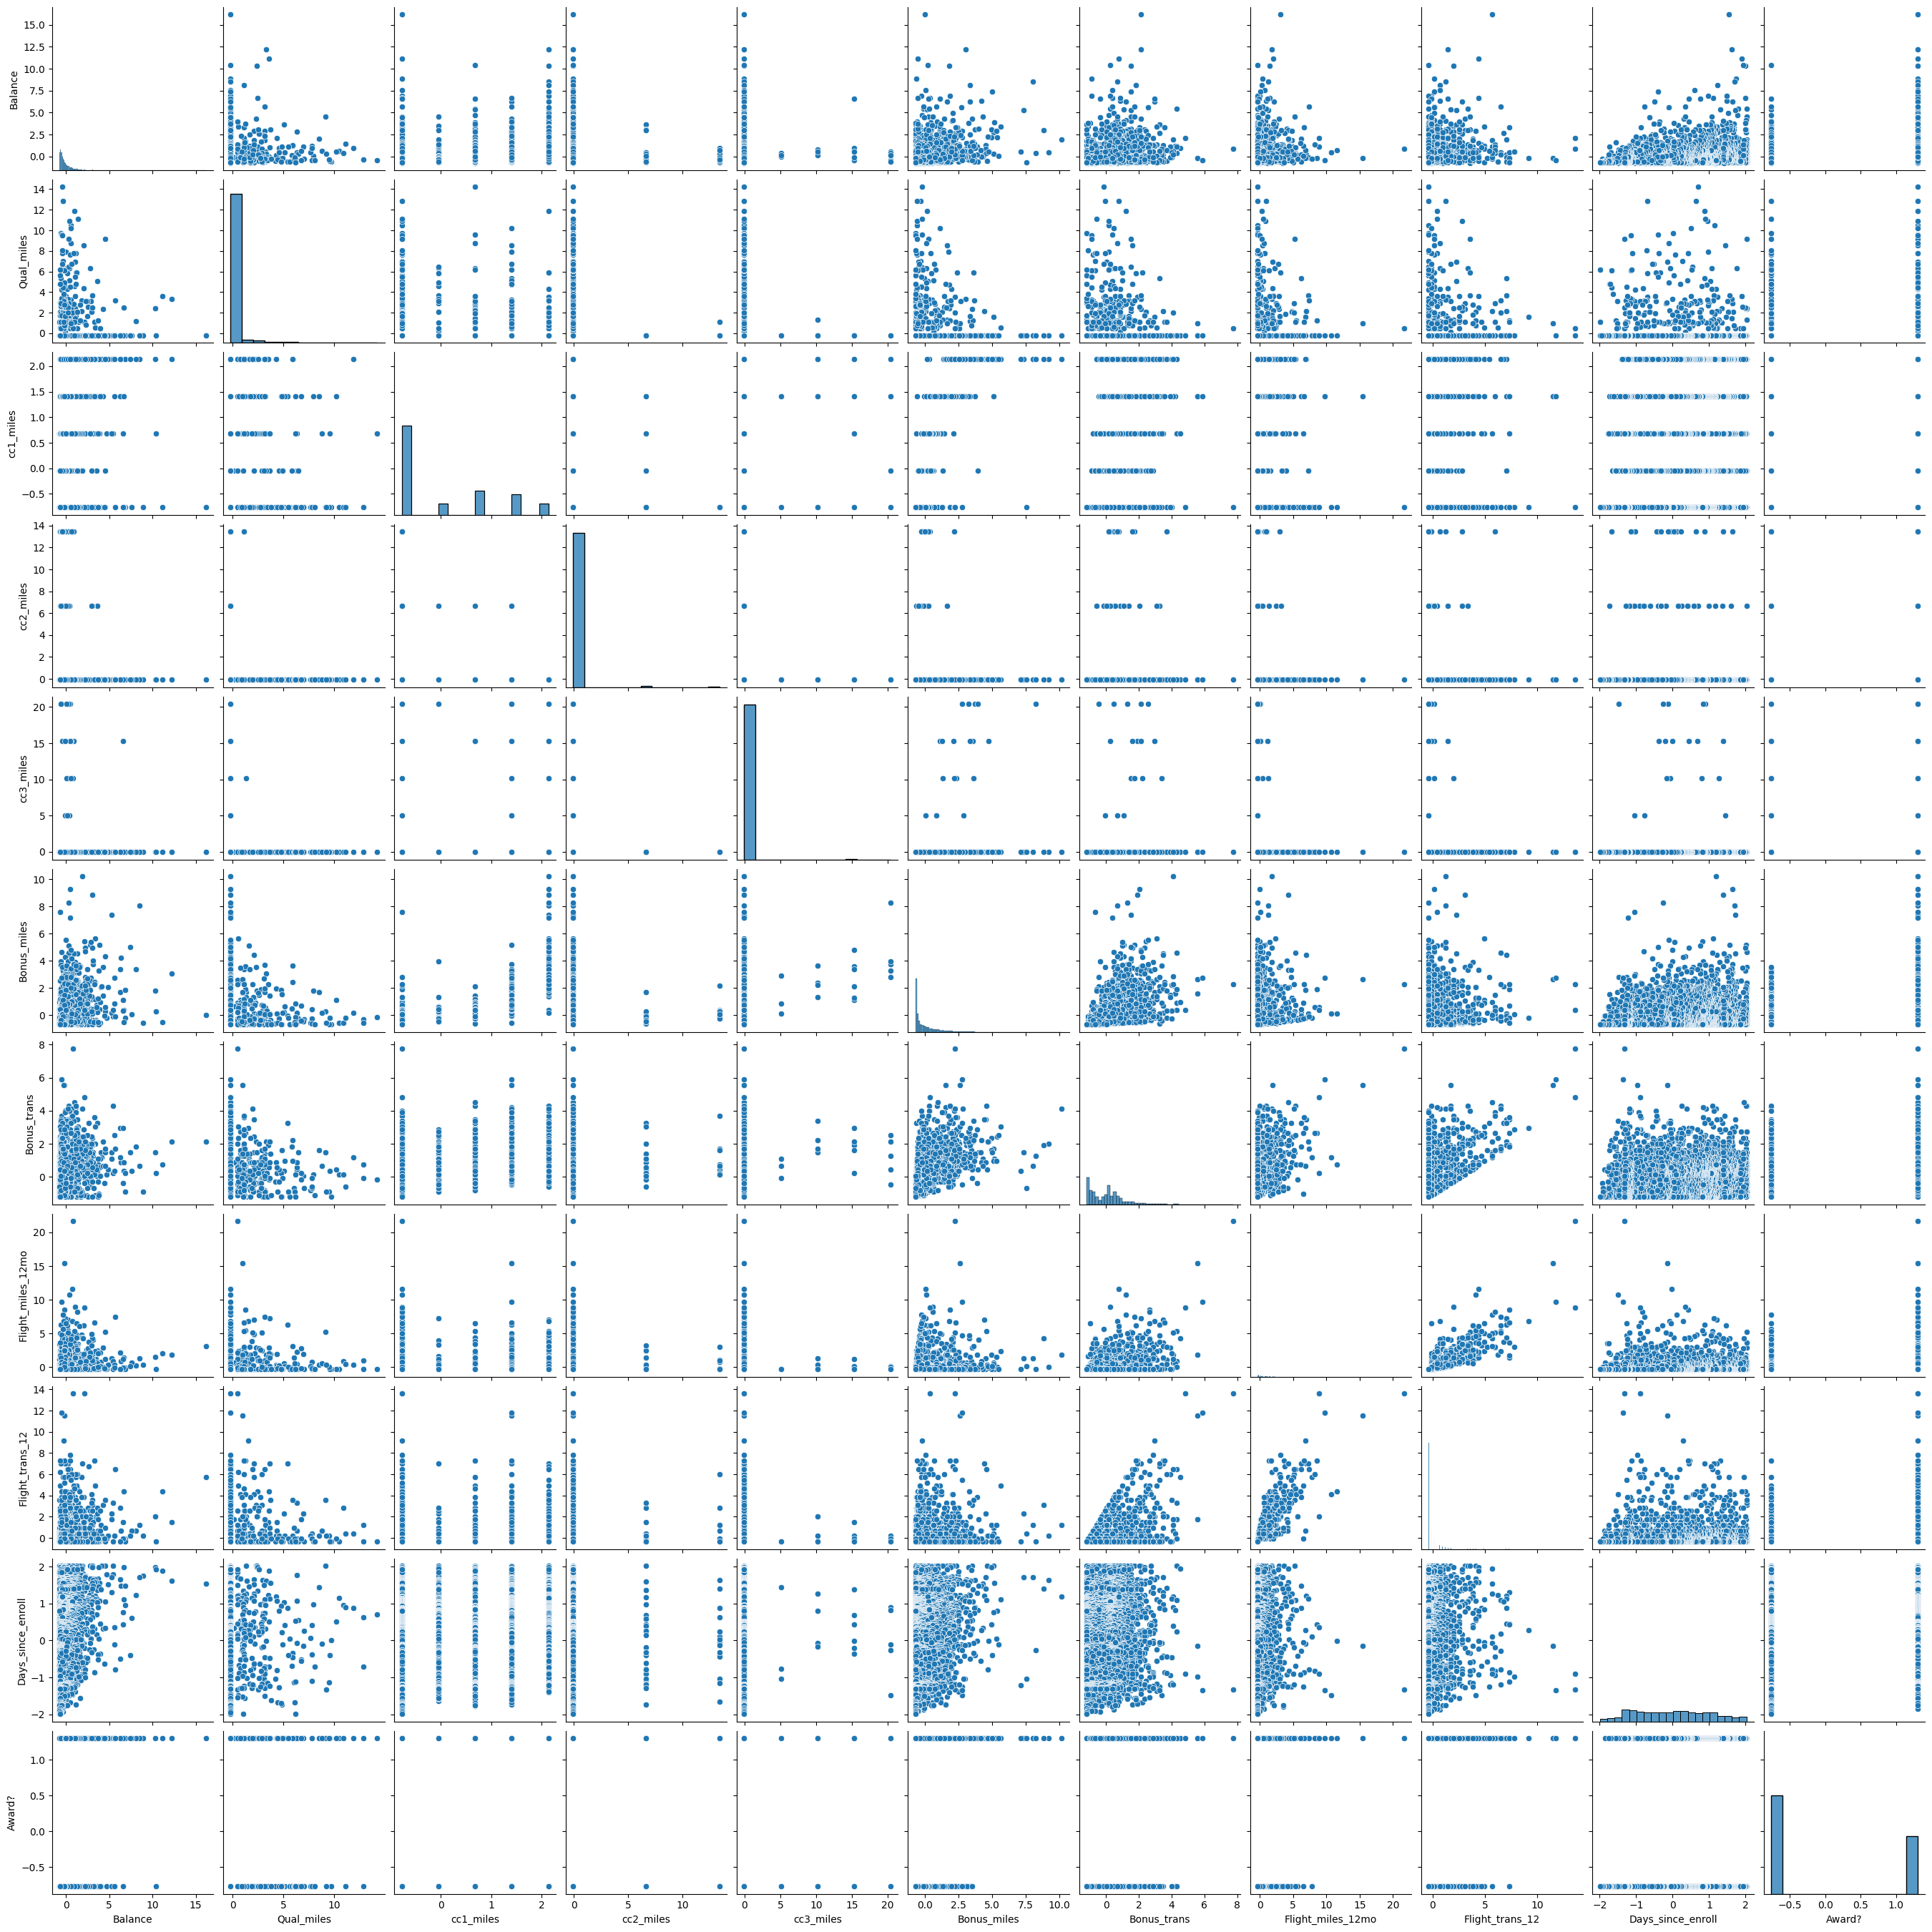

In [32]:
#EDA
sns.pairplot(pd.DataFrame(scaled_data, columns=data.columns[1:]))
plt.show()

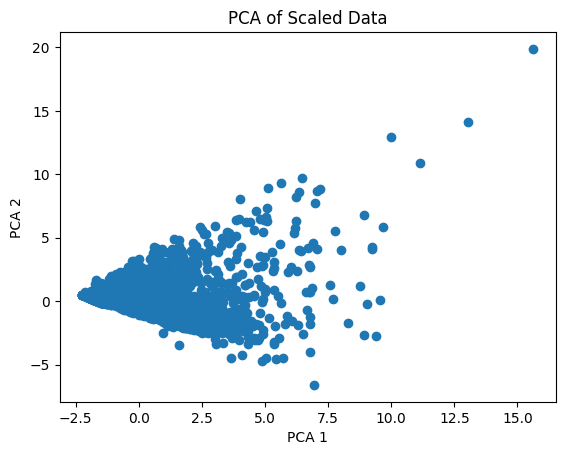

In [33]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA of Scaled Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

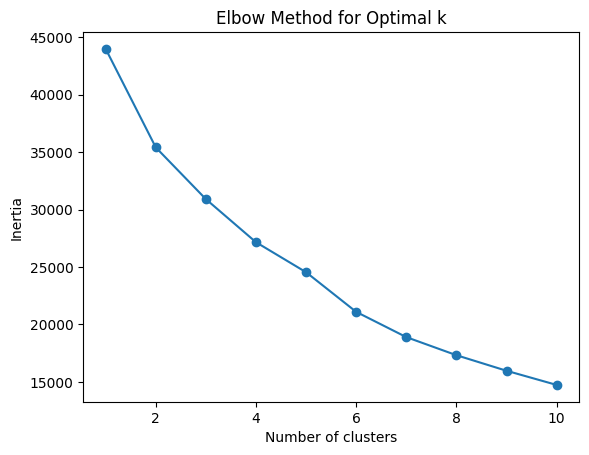

In [34]:
# Elbow method to determine the number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
# Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.31110680893107867


In [37]:
#Hierarchical Clustering
# Linkage matrix
linked = linkage(scaled_data, method='ward')

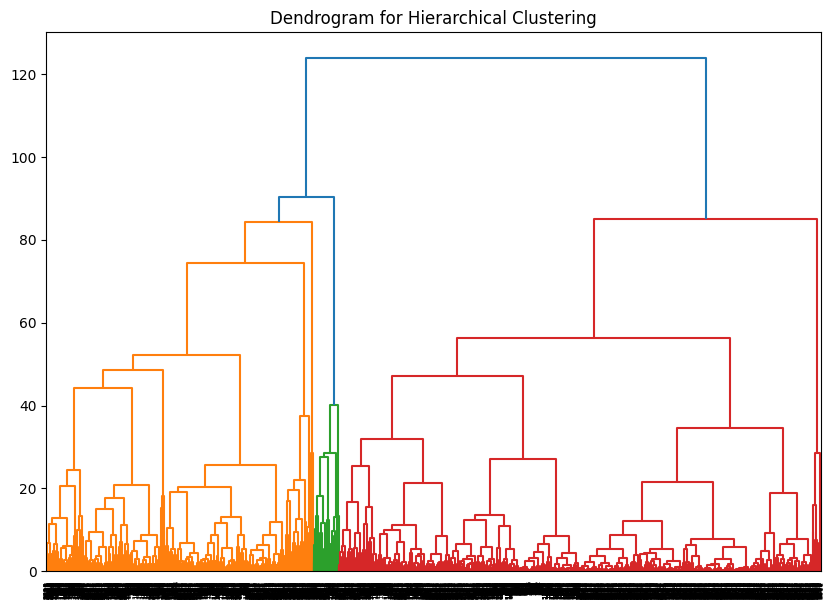

In [38]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [39]:
# Applying Hierarchical Clustering (assuming 3 clusters)
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

In [40]:
# Silhouette Score
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

Hierarchical Clustering Silhouette Score: 0.2940432062008608


In [41]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

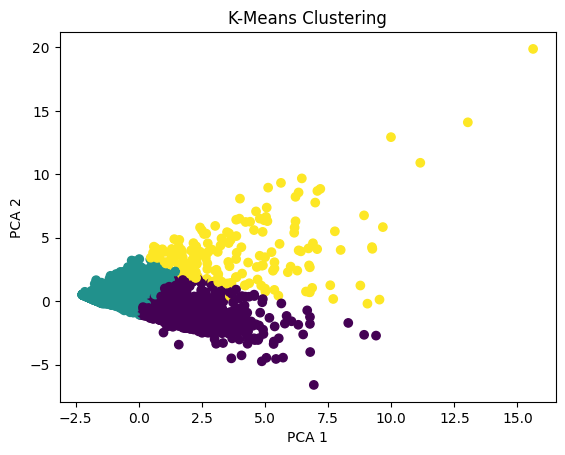

In [42]:
# Visualizing K-Means Clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

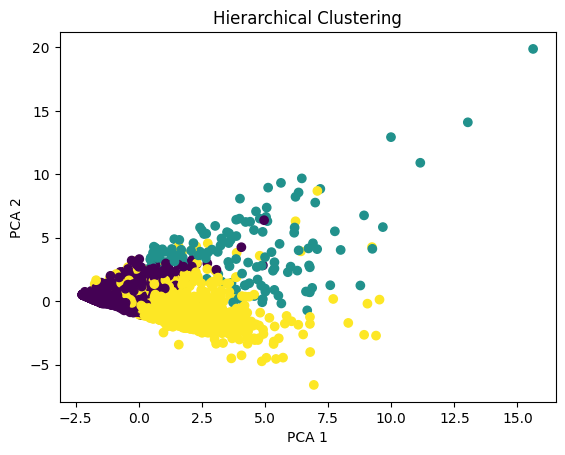

In [43]:
# Visualizing Hierarchical Clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

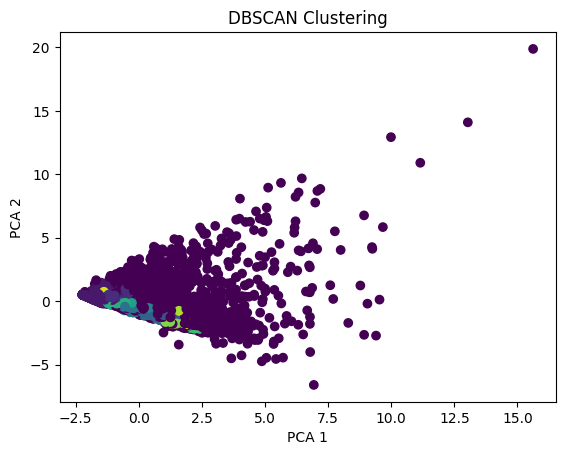

In [44]:
# Visualizing DBSCAN Clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [45]:
# Analyze K-Means clusters
kmeans_clusters = pd.concat([data.reset_index(drop=True), pd.DataFrame({'Cluster': kmeans_labels})], axis=1)
print(kmeans_clusters.groupby('Cluster').mean())

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        1600.939807  117635.571429  126.030498   3.744783   1.002408   
1        2233.072896   44429.433114   98.345483   1.237301   1.019000   
2        1743.660920  190656.775862  951.994253   2.178161   1.034483   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.036918  40624.182986    19.012039         333.447030   
1         1.000388   4854.212098     7.019775         198.970531   
2         1.011494  31181.005747    26.454023        5236.454023   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
0               0.990369        4884.273676  0.649278  
1               0.622334        3711.259791  0.205894  
2              15.252874        4672.270115  0.810345  


In [46]:
# Analyze Hierarchical clusters
hierarchical_clusters = pd.concat([data.reset_index(drop=True), pd.DataFrame({'Cluster': hierarchical_labels})], axis=1)
print(hierarchical_clusters.groupby('Cluster').mean())

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
1        2198.450783   46718.863399    9.274407   1.242266   1.023303   
2        1765.615385  134880.892308  393.323077   2.430769   1.000000   
3        1707.093478  116314.450725  363.839130   3.498551   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
1         1.000000   5037.792688     7.091201         221.167135   
2         1.000000  36582.169231    29.338462        5915.523077   
3         1.035507  37150.356522    18.066667         377.000000   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
1               0.700281        3772.785858  0.188027  
2              16.638462        4599.607692  0.753846  
3               1.150000        4696.888406  0.663043  


In [47]:
# Analyze DBSCAN clusters
dbscan_clusters = pd.concat([data.reset_index(drop=True), pd.DataFrame({'Cluster': dbscan_labels})], axis=1)
print(dbscan_clusters[dbscan_labels != -1].groupby('Cluster').mean())

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        2351.259463   28053.443909         0.0        1.0        1.0   
1        2047.350746   29113.324627         0.0        1.0        1.0   
2         322.600000   53130.400000         0.0        2.0        1.0   
3        1679.798246   50411.552632         0.0        4.0        1.0   
4        1687.189189  101333.108108         0.0        4.0        1.0   
5        1992.859574   75997.736170         0.0        3.0        1.0   
6        1871.000000   41971.895954         0.0        3.0        1.0   
7         297.000000  138516.800000         0.0        2.0        1.0   
8        1960.653846   26170.384615         0.0        2.0        1.0   
9        2213.565217   57875.826087         0.0        2.0        1.0   
10       1277.285714   82194.428571         0.0        5.0        1.0   
11       1366.800000  103188.200000         0.0    